<a href="https://colab.research.google.com/github/mohan-kv/mohan-kv/blob/main/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np

d1={'RAID':[10,np.nan,30,np.nan,50],
      'Points':[1,2,3,np.nan,5],
      'J NO':[18,17,45,93,120]
    }
data=pd.DataFrame(d1)
print(data)

   RAID  Points  J NO
0  10.0     1.0    18
1   NaN     2.0    17
2  30.0     3.0    45
3   NaN     NaN    93
4  50.0     5.0   120


**Assess Data Quality**

Evaluate the overall structure and information of the dataset, including data types, non-null counts, and column names to ensure the data is suitable for analysis.

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RAID    3 non-null      float64
 1   Points  4 non-null      float64
 2   J NO    5 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 248.0 bytes
None


**Detect Missing Values**

Identify columns or rows with absent data entries using methods like .isna() to check for NaN values and .info() to get a summary of the dataset.

In [ ]:
print(data.isna().sum())

RAID      2
Points    1
J NO      0
dtype: int64


**Diagnose type of missing values
Visual method is Heatmap**

Use heatmaps to visually identify the distribution and pattern of missing values across the dataset.

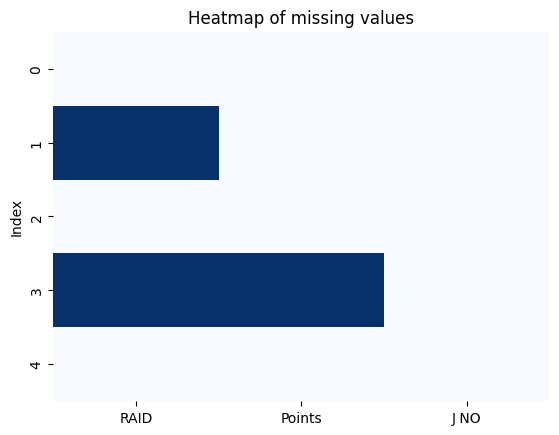

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isna(),cbar=False,cmap='Blues')
plt.title('Heatmap of missing values')
plt.ylabel('Index')
plt.show()

**statistical methods (eg. chi-squared test of
independence)**

Test the relationship between missing values and other categorical variables to determine if they are independent or associated.

In [ ]:
from scipy.stats import chi2_contingency
chi2,p,dof,expected=chi2_contingency(pd.crosstab(data['RAID'].isna(),data['J NO']))
print("P-value:",p)

P-value: 0.2872974951836458


**1. Keep the Missing Value As Is**

Leave missing values unchanged in the dataset.

In [ ]:
print("DataFrame with missing values kept:\n",data)

DataFrame with missing values kept:
    RAID  Points  J NO
0  10.0     1.0    18
1   NaN     2.0    17
2  30.0     3.0    45
3   NaN     NaN    93
4  50.0     5.0   100


**2. Remove Data Objects with Missing Values**

Delete rows that contain any missing values.

In [ ]:
dr=data.dropna()
print("DataFrame with rows with missing values removed:\n",dr)

DataFrame with rows with missing values removed:
    RAID  Points  J NO
0  10.0     1.0    18
2  30.0     3.0    45
4  50.0     5.0   100



 **3. Remove Attributes with Missing Values**

 Delete columns that contain any missing values.

In [ ]:
dc=data.dropna(axis=1)
print("DataFrame with columns with missing values removed:\n",dc)

DataFrame with columns with missing values removed:
    J NO
0    18
1    17
2    45
3    93
4   100


**4. Estimate and Impute Missing Values**

mean imputation: replace missing values with the mean of the respective column.

In [ ]:
dim=data.fillna(data.mean())
print("DataFrame with missing values imputed using mean:\n",dim)

DataFrame with missing values imputed using mean:
    RAID  Points  J NO
0  10.0    1.00    18
1  30.0    2.00    17
2  30.0    3.00    45
3  30.0    2.75    93
4  50.0    5.00   100


median imputation: replace missing values with the median of the respective column.

In [ ]:
dim1=data.fillna(data.median())
print("DataFrame with missing values imputed using median:\n",dim1)

DataFrame with missing values imputed using median:
    RAID  Points  J NO
0  10.0     1.0    18
1  30.0     2.0    17
2  30.0     3.0    45
3  30.0     2.5    93
4  50.0     5.0   100


mode imputation: replace missing values with the mode (most frequent value) of the respective column.

In [ ]:
dim2=data.fillna(data.mode().iloc[0])
print("DataFrame with missing values imputed using mode:\n",dim2)

DataFrame with missing values imputed using mode:
    RAID  Points  J NO
0  10.0     1.0    18
1  10.0     2.0    17
2  30.0     3.0    45
3  10.0     1.0    93
4  50.0     5.0   100


**5.Inetrpolation:**The process of estimating anbd filling in missing data points within a dataset based on the surrounding data

In [ ]:
data.interpolate()

,RAID,Points,J NO
0,10.0,1.0,18
1,20.0,2.0,17
2,30.0,3.0,45
3,40.0,4.0,93
4,50.0,5.0,120


# **Dealing with outliers**




**Do Nothing:** Leave the dataset unchanged, including outliers.

In [ ]:
print("DataFrame with Outliers kept as is:\n",data)


DataFrame with Outliers kept as is:
    RAID  Points  J NO
0  10.0     1.0    18
1   NaN     2.0    17
2  30.0     3.0    45
3   NaN     NaN    93
4  50.0     5.0   100


**Replace with Upper/Lower Cap:** Cap extreme values at a defined maximum (upper cap) or minimum (lower cap) to limit their influence.

In [27]:
import pandas as pd
import numpy as np

Q1=data['J NO'].quantile(0.25)
Q3=data['J NO'].quantile(0.75)
IQR=Q3 - Q1
lcap= Q1 - 1.5 * IQR
ucap= Q3 + 1.5 * IQR

print("Q1 (25th percentile):",Q1)
print("Q3 (75th percentile):",Q3)
print("IQR (Interquartile Range):",IQR)
print("Lower Cap:",lcap)
print("Upper Cap:",ucap)

Q1 (25th percentile): 18.0
Q3 (75th percentile): 93.0
IQR (Interquartile Range): 75.0
Lower Cap: -94.5
Upper Cap: 205.5


In [26]:
lowercap=10
uppercap=100
d=data.clip(lower=lowercap,upper=uppercap)
print(d)

   RAID  Points  J NO
0  10.0    10.0    18
1   NaN    10.0    17
2  30.0    10.0    45
3   NaN     NaN    93
4  50.0    10.0   100


**Perform Log Transformation:** Apply a logarithmic transformation to reduce the impact of extreme values.

In [ ]:
dlog=data.copy()
dlog['RAID']=np.log(dlog['RAID'].fillna(1))

print("DataFrame with 'RAID' log transformation:\n",dlog)


DataFrame with 'RAID' log transformation:
        RAID  Points  J NO
0  2.302585     1.0    18
1  0.000000     2.0    17
2  3.401197     3.0     7
3  0.000000     NaN    93
4  3.912023     5.0   100


**Remove Data Objects with Outliers:** Eliminate rows from a dataset where any column value is flagged as an outlier based on a specified criterion, such as Z-scores exceeding a threshold

In [25]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'RAID': [10, 20, 30, 40, 50, 1000],
    'Points': [111, 221, 321, 423, 511, 5000],
    'J': [18, 17, 45, 93, 120, 999]
})

zrs=(df - df.mean()) / df.std()
print("Z-scores:",zrs)
dfno=df[(np.abs(zrs) < 2).all(axis=1)]

print("\nDataFrame after removing outliers with threshold of 2:")
print(dfno)


Z-scores:        RAID    Points         J
0 -0.458461 -0.514803 -0.511056
1 -0.433225 -0.457419 -0.513646
2 -0.407988 -0.405252 -0.441131
3 -0.382752 -0.352041 -0.316820
4 -0.357515 -0.306134 -0.246895
5  2.039941  2.035649  2.029547

DataFrame after removing outliers with threshold of 2:
   RAID  Points    J
0    10     111   18
1    20     221   17
2    30     321   45
3    40     423   93
4    50     511  120
